In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya plot
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ----------------------------------------------------------------------
# Langkah 1: Memuat Data
# ----------------------------------------------------------------------

# Pastikan file 'toyota.csv' berada di direktori yang sama dengan Notebook ini
df = pd.read_csv('toyota.csv')

print("--- 1. Informasi Dasar Data ---")
print(df.info())
print("\n--- 2. Lima Baris Pertama ---")
print(df.head())
print("\n--- 3. Statistik Deskriptif ---")
print(df.describe().T)

--- 1. Informasi Dasar Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None

--- 2. Lima Baris Pertama ---
   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36


--- 4. Matriks Korelasi dengan Harga ---
price         1.000000
engineSize    0.727592
year          0.420959
tax           0.214498
mpg          -0.039910
mileage      -0.297936
Name: price, dtype: float64


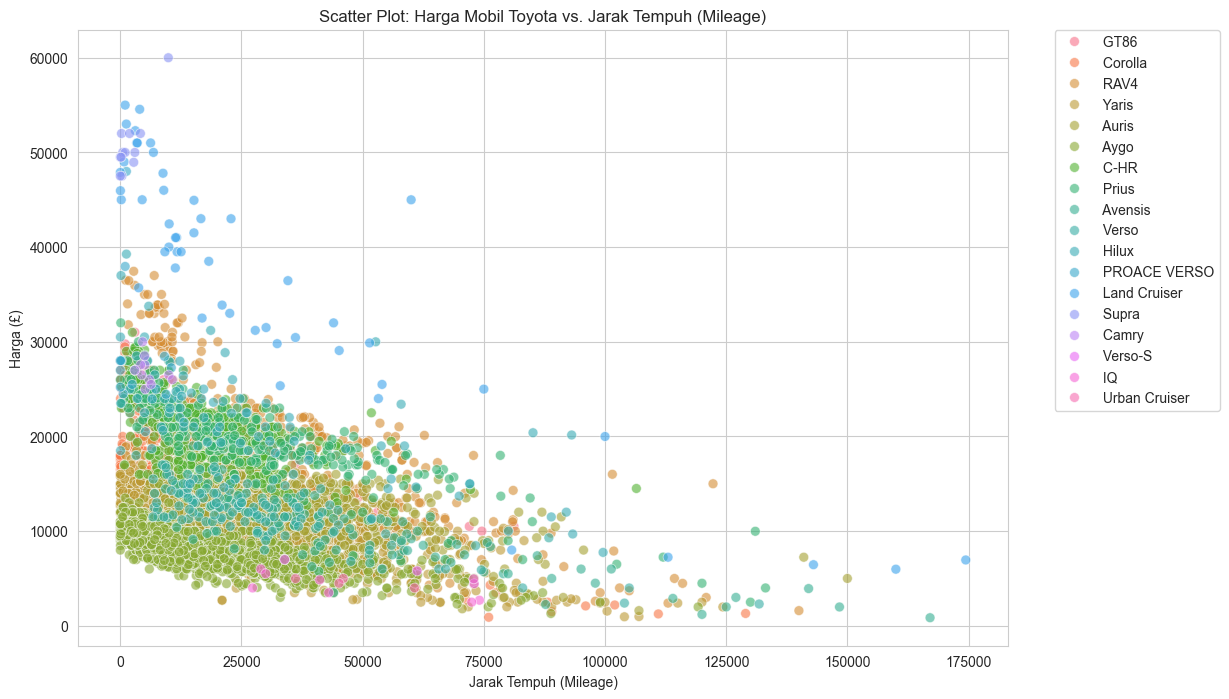

In [ ]:

numeric_cols = ['price', 'mileage', 'year', 'tax', 'mpg', 'engineSize']
print("\n--- 4. Matriks Korelasi dengan Harga ---")
print(df[numeric_cols].corr()['price'].sort_values(ascending=False))
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mileage', y='price', hue='model', data=df, alpha=0.6, s=50)
plt.title('Scatter Plot: Harga Mobil Toyota vs. Jarak Tempuh (Mileage)')
plt.xlabel('Jarak Tempuh (Mileage)')
plt.ylabel('Harga (£)')
plt.ticklabel_format(style='plain', axis='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


--- 5. 5 Model Teratas Berdasarkan Jumlah Data ---
model
Yaris    2122
Aygo     1961
Auris     712
C-HR      479
RAV4      473
Name: count, dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_19256\4042068650.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette="viridis")


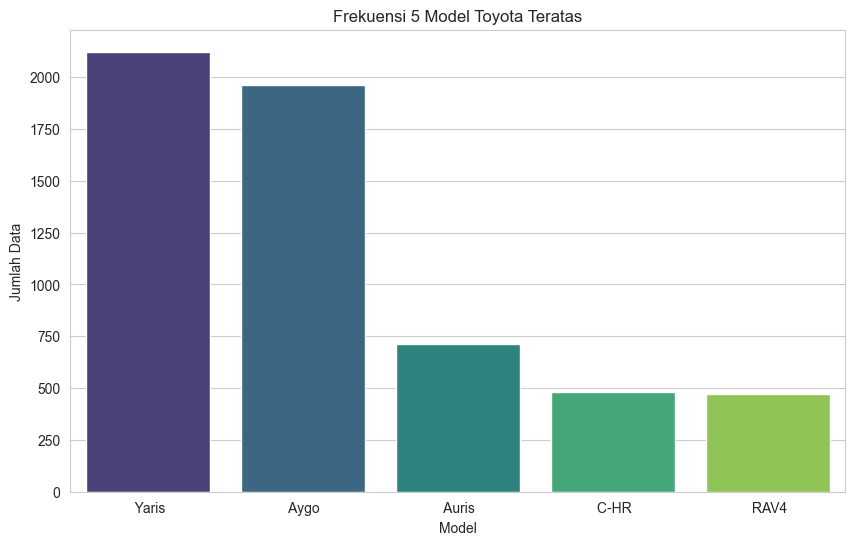


--- 6. Harga Rata-rata berdasarkan Jenis Bahan Bakar ---
fuelType
Hybrid    17185.472834
Diesel    15697.807157
Other     14121.161905
Petrol     9759.537803
Name: price, dtype: float64


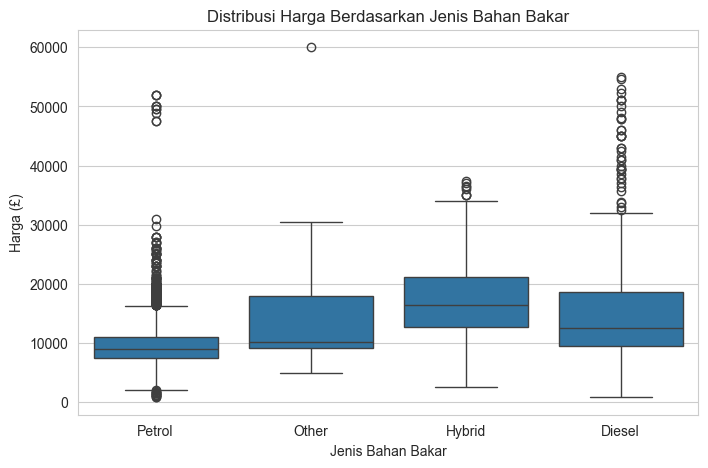

In [3]:
# ----------------------------------------------------------------------
# Langkah 3: Analisis Variabel Kategorikal
# ----------------------------------------------------------------------

# A. Distribusi Model
print("\n--- 5. 5 Model Teratas Berdasarkan Jumlah Data ---")
model_counts = df['model'].value_counts().head(5)
print(model_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts.index, y=model_counts.values, palette="viridis")
plt.title('Frekuensi 5 Model Toyota Teratas')
plt.xlabel('Model')
plt.ylabel('Jumlah Data')
plt.show()

# B. Harga Rata-rata berdasarkan Jenis Bahan Bakar (fuelType)
fuel_price = df.groupby('fuelType')['price'].mean().sort_values(ascending=False)

print("\n--- 6. Harga Rata-rata berdasarkan Jenis Bahan Bakar ---")
print(fuel_price)

plt.figure(figsize=(8, 5))
sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Distribusi Harga Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Harga (£)')
plt.show()

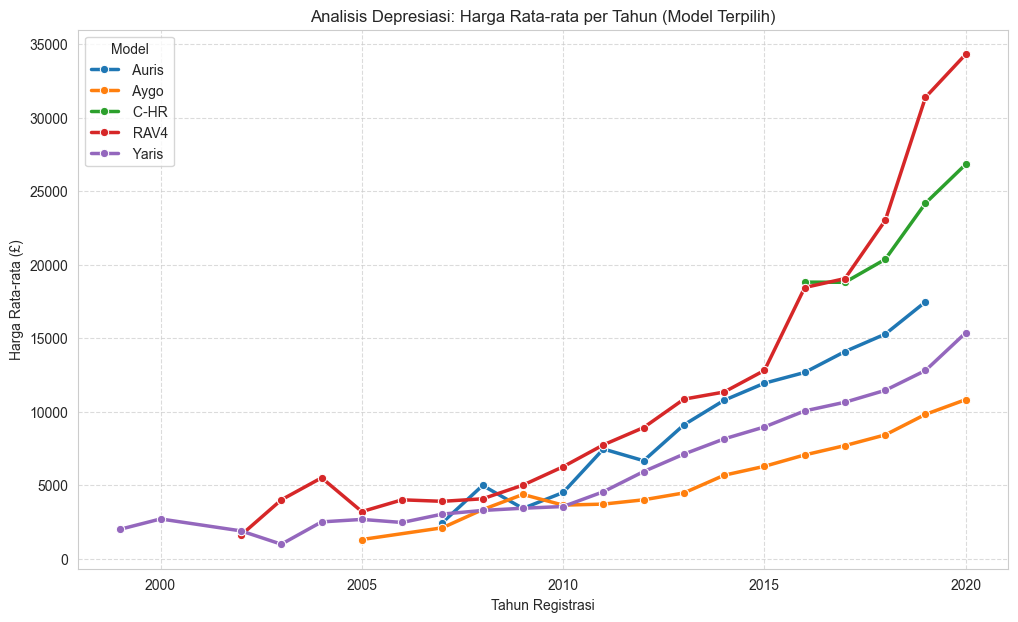

In [4]:
# ----------------------------------------------------------------------
# Langkah 4: Depresiasi Rata-rata per Tahun untuk Model Pilihan
# ----------------------------------------------------------------------

# Pilih 3-4 Model paling populer (berdasarkan hasil Langkah 3)
top_models = model_counts.index.tolist() 

depreciation_data = df[df['model'].isin(top_models)]
avg_price_by_year_model = depreciation_data.groupby(['model', 'year'])['price'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='year', y='price', hue='model', data=avg_price_by_year_model, marker='o', linewidth=2.5)
plt.title('Analisis Depresiasi: Harga Rata-rata per Tahun (Model Terpilih)')
plt.xlabel('Tahun Registrasi')
plt.ylabel('Harga Rata-rata (£)')
plt.legend(title='Model')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()